### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. <br>

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.<br>

 

The company wants to know the following things about the prospective properties:<br>

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

### Business Goal
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- To  determine the optimal value of lambda for ridge and lasso regression. 
- This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps Taken :
The solution is divided into the following sections:

1. Reading and understanding data
2. Inspecting the dataframe
3. Data Cleaning 
4. Data Visualization 
5. Data Preparation
6. Model Selection and Evaluation
7. Residual Analysis

## 1. Reading and Understanding the data

### 1.1 Importing the Required libraries

In [1]:
#Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score


### 1.2 Loading the dataset

- **dataframe name : data**

In [2]:
# importing the dataset and seting 'Id' as index
data = pd.read_csv( 'train.csv', index_col = 'Id')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Inspecting the dataframe

### 2.1 Basic data check

In [3]:
#printing the shape of the data
print('*'*10,'Shape','*'*10)
print(data.shape)

print()
#checking summary of the data
print('*'*10,'Info','*'*10)
print(data.info())


********** Shape **********
(1460, 80)

********** Info **********
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null 

In [4]:
#checking the statistical summary of the data
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well.And the dataset seems to have outliers, so we will need to treat them accordingly.


### 2.2 Checking null values

In [5]:
#Checking the null values are present in the data
data.isnull().any().any()

True

- This means that null values are present in the data


In [6]:
## Checking the percentage of null values in the dataset
round( 100*( data.isnull().sum() / len(data.index) ), 2 ).sort_values(ascending = False).head(25)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageFinish     5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
RoofMatl         0.00
Exterior1st      0.00
RoofStyle        0.00
ExterQual        0.00
Exterior2nd      0.00
YearBuilt        0.00
dtype: float64

## 3. Data Cleaning

### 3.1 Imputing the null values
- We will drop the the attributes having null values greater than 45%. Because if we try to impute this values, the columns will get highly skewed and we may not get valueable insights from them.So it's better to drop them.

In [7]:
#dropping the attributes with more than 45% null values
data.drop( [ 'PoolQC', 'MiscFeature', 'Alley','Fence' ], axis = 1 , inplace = True)

In [8]:
#again checking the data and shape of the data
print('Shape: ' , data.shape)
data.head()

Shape:  (1460, 76)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
#again checking for the null values
round( 100*( data.isnull().sum() / len(data.index) ), 2).sort_values( ascending = False ).head(25)

FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
YearBuilt        0.00
Exterior2nd      0.00
Exterior1st      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
SalePrice        0.00
dtype: float64

- *'GarageCond' , 'GarageType' , 'GarageYrBlt' , 'GarageFinish'*  have same number of null values. Checking if there is a relation between them.

In [10]:
#Checking the values 'GarageCond' , 'GarageType' , 'GarageYrBlt' , 'GarageFinish'
data[ data[['GarageCond' , 'GarageType' , 'GarageYrBlt' , 'GarageFinish']].isnull() ]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# For confirming check the array of whole row
np.array( data[ data[['GarageCond' , 'GarageType' , 'GarageYrBlt' , 'GarageFinish']].isnull()].loc[:1,:] )

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
      dtype=object)

- we can observe here that most the values are null. So imputing it doesn't makes any sense. We will simply drop the null values for *'GarageCond' , 'GarageType' , 'GarageYrBlt' , 'GarageFinish'* columns.

In [12]:
# dropping all the rows containing null values in 'GarageCond' , 'GarageType' , 'GarageYrBlt' , 'GarageFinish'

data.dropna( subset=['GarageCond' , 'GarageType' , 'GarageYrBlt' , 'GarageFinish'], inplace=True )

In [13]:
#checcking the shape of the dataset again
data.shape

(1379, 76)

In [14]:
#Again checking the percentage of the null values
round( 100*( data.isnull().sum() / len(data.index) ), 2).sort_values(ascending = False).head(15)

FireplaceQu     44.82
LotFrontage     18.27
BsmtFinType2     2.25
BsmtExposure     2.25
BsmtQual         2.18
BsmtFinType1     2.18
BsmtCond         2.18
MasVnrArea       0.58
MasVnrType       0.58
Electrical       0.07
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
SalePrice        0.00
ExterQual        0.00
dtype: float64

- Here also, we observe that 'BsmtFinType2' , 'BsmtExposure' , 'BsmtQual' , 'BsmtFinType1','BsmtCond' have simliar percentage of null values. Let's check if they have any relationship between them.

In [15]:
#Check for 'BsmtFinType2' , 'BsmtExposure' , 'BsmtQual' , 'BsmtFinType1','BsmtCond' 

data[data[['BsmtFinType2' , 'BsmtExposure' , 'BsmtQual' , 'BsmtFinType1','BsmtCond']].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Here also we observe that most of the columns have null values, so it's better to drop the null values for this columns as well as remaining columns as they have a very low percentage of the null values


In [16]:
#dropping the rows with null values
data.dropna( subset=['BsmtFinType2' , 'BsmtExposure' , 'BsmtQual' , 'BsmtFinType1','BsmtCond',
                     'MasVnrArea','MasVnrType','Electrical'], inplace=True )

In [17]:
#Checking the shape of the dataframe again
data.shape

(1338, 76)

- Still we have a good amount of data. So we can proceed further

In [18]:
#Again Checking the percentage of null values
round( 100*( data.isnull().sum() / len(data.index) ), 2).sort_values( ascending = False ).head(10)

FireplaceQu    44.17
LotFrontage    18.24
SalePrice       0.00
ExterCond       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
MasVnrArea      0.00
ExterQual       0.00
dtype: float64

- Now we have null values only for 'FireplaceQu' and 'LotFrontage' . Lets check value counts to get an idea

In [19]:
#Checking the value_counts for the 'FireplaceQu' and 'LotFrontage' 
print('FireplaceQu:\n\n', data['FireplaceQu'].value_counts(normalize = True) )
print()
print('*'*25,end = '\n\n')
print( 'LotFrontage:\n\n',data['LotFrontage'].value_counts(normalize = True) )


FireplaceQu:

 Gd    0.495315
TA    0.406961
Fa    0.044177
Ex    0.030790
Po    0.022758
Name: FireplaceQu, dtype: float64

*************************

LotFrontage:

 60.0     0.109689
80.0     0.061243
70.0     0.057587
75.0     0.045704
50.0     0.044790
           ...   
39.0     0.000914
106.0    0.000914
38.0     0.000914
182.0    0.000914
137.0    0.000914
Name: LotFrontage, Length: 107, dtype: float64


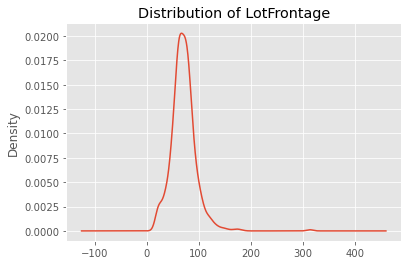

In [20]:
#check the distribution of 'LotFrontage'
data.LotFrontage.plot(kind = 'kde')
plt.title('Distribution of LotFrontage')
plt.show()

- It is a normal distribution with some extension at both sides. But we can impute the null values of 'LotFrontage' with median.

In [21]:
#Replacing the null values with median value of 'LotFrontage'
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())

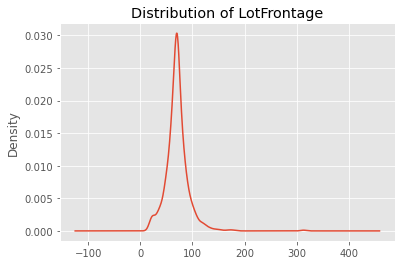

In [22]:
#Again check the distribution of 'LotFrontage'
data.LotFrontage.plot(kind = 'kde')
plt.title('Distribution of LotFrontage')
plt.show()

We have a lots of skewness here, we cannot drop the outliers because we can lose important information. So the solution to that is use the __log transformation__ for this column.

In [23]:
#Log Transformation of 'LotFrontage' column
# Here we added 1 because we had negative numbers also
data['LotFrontage'] = (data['LotFrontage']+1).transform(np.log) 


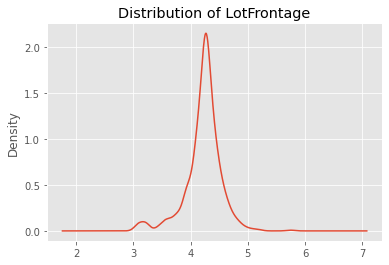

In [24]:
#Again check the distribution of 'LotFrontage'
data.LotFrontage.plot(kind = 'kde')
plt.title('Distribution of LotFrontage')
plt.show()

- We will impute the null values of the column 'FireplaceQu' by replacing null values with None

In [25]:
# Replacing the Nan values with "Not Available"
data['FireplaceQu'] = data['FireplaceQu'].replace(np.nan , 'Not Available')

In [26]:
#Again checking the percentage of null values
round( 100*( data.isnull().sum() / len(data.index) ), 2).sort_values( ascending = False ).head(10)

SalePrice      0.0
Foundation     0.0
RoofMatl       0.0
Exterior1st    0.0
Exterior2nd    0.0
MasVnrType     0.0
MasVnrArea     0.0
ExterQual      0.0
ExterCond      0.0
BsmtQual       0.0
dtype: float64

- We have imputed all the null values in appropriate manner. We will proceed further

### 3.2 Check for Duplicate values

In [27]:
# Checking for duplicate values in the dataframe
data[ data.duplicated() ]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


- We can conclude that there are __no duplicate__ values in the dataframe

### 3.3 Outlier Analysis and Handling the Outliers

In [28]:
# Checking statistical summary at 25%,50%,75%,90%,95% and above

data.describe( percentiles=[.25,.5,.75,.90,.95,.99] )

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,4.225723,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,0.311949,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,3.091042,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,4.110874,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,4.262680,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,4.394449,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
90%,120.000000,4.543295,14575.900000,8.000000,7.000000,2006.000000,2007.000000,340.000000,1079.900000,134.100000,...,264.300000,130.000000,109.200000,0.000000,0.00000,0.000000,0.000000,10.000000,2010.000000,283624.100000
95%,160.000000,4.663439,17508.850000,8.000000,8.000000,2007.000000,2007.000000,464.300000,1280.300000,412.350000,...,342.300000,172.300000,180.450000,0.000000,168.00000,0.000000,0.000000,11.000000,2010.000000,335000.000000
99%,190.000000,4.919121,39727.700000,10.000000,9.000000,2009.000000,2009.000000,808.600000,1593.790000,858.640000,...,510.260000,283.890000,262.150000,168.000000,272.26000,0.000000,700.000000,12.000000,2010.000000,443944.430000


In [29]:
# Creating a list for integer and float attributes only
data.select_dtypes( include = ['int64' , 'float64' ] ).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

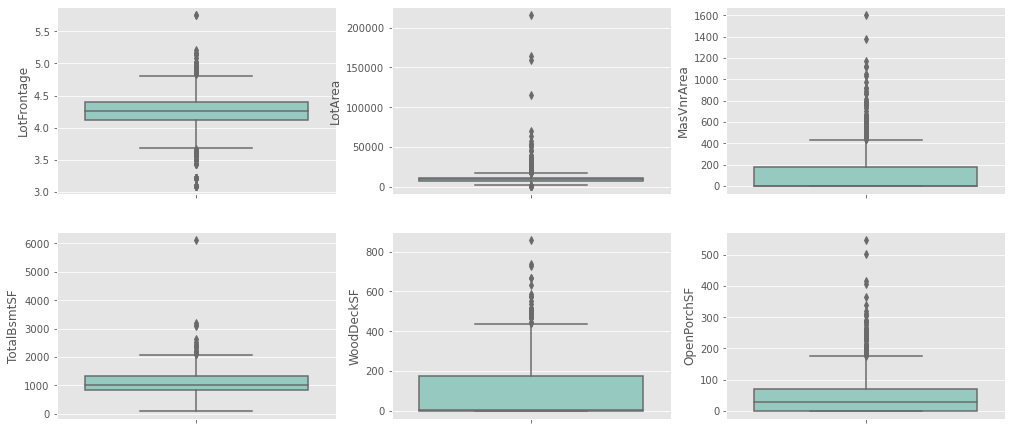

In [30]:
# Check the outliers in some of the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotFrontage' , palette = 'Set3' , data = data)

plt.subplot(5,3,2)
sns.boxplot(y = 'LotArea', palette='Set3', data = data)

plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = data)

plt.subplot(5,3,4)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = data)

plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = data)

plt.subplot(5,3,6)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = data)

plt.show()

- **`'LotArea'`** seems to have a lot of outliers.
- Capping or removing the outliers is not a solution always, because we may lose the important data. So we will transfrom the 'LotArea' and for others we will capthe data.

In [31]:
# Log Transformation of above attributes
data['LotArea'] = data['LotArea'].transform(np.log)

In [32]:
# Removing values beyond 98% for MasVnrArea
data = data[data["MasVnrArea"] < data['MasVnrArea'].quantile(0.98)]

# Removing values beyond 99% for TotalBsmtSF
data = data[data["TotalBsmtSF"] < data['TotalBsmtSF'].quantile(0.99)]

# Removing values beyond 99% for WoodDeckSF
data = data[data["WoodDeckSF"] < data['WoodDeckSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
data = data[data["OpenPorchSF"] < data['OpenPorchSF'].quantile(0.99)]

### We are done with imputation for null values and handling of outliers. So check the data retained.

In [33]:
# Determine the percentage of data retained

round(100*(len(data)/1460),2)


86.99

### Still we have **`87%`** of the data

- We can create a new attribute from __'YearBuilt', 'YearRemodAdd', 'YrSold'__ this columns. We can determine how old was the house/building while selling.But before that do sanity check if *'YearRemodAdd' < 'YrBuilt'* ,because its an anomaly. 

In [34]:
#drop the anamalous row : yearbuilt > YearRemodAdd

data = data[ (data.YearRemodAdd <= data.YrSold) &  (data.YearRemodAdd >= data.YearBuilt) ]

#Check the shape of the data
data.shape

(1270, 76)

In [35]:
#YearBuilt : Original construction date
#YearRemodAdd : Remodel date
#YrSold : Year Sold (YYYY)

data[['YearBuilt','YearRemodAdd','YrSold']].head()

,YearBuilt,YearRemodAdd,YrSold
Id,,,
1,2003,2003,2008
2,1976,1976,2007
3,2001,2002,2008
4,1915,1970,2006
5,2000,2000,2008


In [36]:
'''If YearBuilt = YearRemodAdd we will simply subtract Yearbuilt from yearSold otherwise we will subtractYearRemodAdd
from YearSold'''
# HouseAge :: Age of the house after building it or remodelling it

#writing a function to apply this

def getYear(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']

## YearOld : Age of the building
data['HouseAge'] = data.apply(getYear, axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,4.189655,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,5
2,20,RL,4.394449,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,31
3,60,RL,4.234107,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,6
4,70,RL,4.110874,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,36
5,60,RL,4.442651,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,8


In [37]:
#Also checking the variable 'GarageYrBlt'
print( data.GarageYrBlt.max() )
print( data.GarageYrBlt.min() )

2010.0
1900.0


- 'GarageYrBlt' ranges from (1900,2010). Here we we will clasify this garage as __new(1) and old(0)__. The garages which was built before 2000 are considered as old(0) ,otherwise new(1).

In [38]:
#define a function and apply on the dataframe
def getGarageOldOrNew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
data['GarageOldOrNew'] = data['GarageYrBlt'].apply(getGarageOldOrNew)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,GarageOldOrNew
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,4.189655,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,5,1
2,20,RL,4.394449,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,31,0
3,60,RL,4.234107,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,6,1
4,70,RL,4.110874,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,36,0
5,60,RL,4.442651,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,8,1


In [39]:
'''Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can simply drop these 
columns as we would only be using the derived columns for further analysis '''

data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)
data.reset_index(drop=True, inplace=True)

### 3.4 Checking for highly biased attributes in Dataframe

- We will define a function which will check for the skewness of the attribute and if we find the categorical columns highly skewed we will simply drop it


In [40]:
# Drop the following categorical columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getSkewed():
    colRemove = []
    column = (data.select_dtypes(include=['object']).columns)
    for col in column :
        if(data[col].value_counts().max() >= 1079): 
            colRemove.append(col)
    return colRemove

columnsToBeRemoved = getSkewed()

# Remove the columns with skewed data

data.drop(columnsToBeRemoved, axis = 1, inplace = True)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleCondition,SalePrice,HouseAge,GarageOldOrNew
0,60,RL,4.189655,9.041922,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,2,Normal,208500,5,1
1,20,RL,4.394449,9.169518,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,0,5,Normal,181500,31,0
2,60,RL,4.234107,9.328123,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,9,Normal,223500,6,1
3,70,RL,4.110874,9.164296,IR1,Corner,Crawfor,1Fam,2Story,7,...,272,0,0,0,0,2,Abnorml,140000,36,0
4,60,RL,4.442651,9.565214,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,0,12,Normal,250000,8,1


Highly skewed data has been dropped.

### 3.5 Changing to appropriate dtype


- We will change the dtype if necessary and change the values of categorical column to their appropriate name given in the dictionary. This will be help to redue the number of columns after creating dummy variables.

> #### MSSubClass

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [41]:
# Check the value_counts. If the values are too small we can change it to others

data.MSSubClass.value_counts(normalize = True) *100

20     37.401575
60     21.181102
50     10.000000
120     6.535433
160     4.566929
80      4.330709
70      4.330709
30      4.015748
90      2.204724
190     1.496063
85      1.496063
75      0.944882
45      0.708661
180     0.472441
40      0.314961
Name: MSSubClass, dtype: float64

In [42]:
#  we will replace the value of column with appropriate values mentioned in the dictionary

data.MSSubClass.replace({20: '1-STORY 1946 & NEWER ALL STYLES', 60: '2-STORY 1946 & NEWER', 50:'1-1/2 STORY FINISHED ALL AGES',
           120: '1-STORY PUD', 160 : '2-STORY PUD', 80: 'SPLIT OR MULTI-LEVEL',70:'2-STORY 1945 & OLDER',
           30 : '1-STORY 1945 & OLDER',40:'Others', 45 :'Others' ,75 :'Others', 85 :'Others', 90 :'Others', 
              150 :'Others', 180:'Others' , 190 :'Others'}, inplace = True)




> #### MSZoning

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [43]:
#Checking the value_counts
data.MSZoning.value_counts(normalize = True) * 100

RL         79.527559
RM         14.488189
FV          4.488189
RH          0.866142
C (all)     0.629921
Name: MSZoning, dtype: float64

In [44]:
#  we will replace the value of column with appropriate values mentioned in the dictionary

data.MSZoning.replace({'RH': 'Others', 'C (all)': 'Others'}, inplace = True)

> #### LotShape 

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [45]:
# Checking the value_counts
data.LotShape.value_counts(normalize = True)

Reg    0.627559
IR1    0.337795
IR2    0.028346
IR3    0.006299
Name: LotShape, dtype: float64

In [46]:
# we will replace IR2 with IR3 beacuse both are irregular. 

data.LotShape.replace({'IR2' : 'IR3'},inplace = True)

> #### LotConfig

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
         FR2	Frontage on 2 sides of property
         FR3	Frontage on 3 sides of property

In [47]:
#Checking the value_counts
data.LotConfig.value_counts(normalize=True) * 100

Inside     71.968504
Corner     18.031496
CulDSac     6.456693
FR2         3.228346
FR3         0.314961
Name: LotConfig, dtype: float64

In [48]:
# we will replace FR2 and FR3 with FR>1
data.LotShape.replace({'FR2' : 'FR>1','FR3' : 'FR>1'},inplace = True)

> #### Neighborhood

In [49]:
#Checking the value_counts for Neighborhood
data.Neighborhood.value_counts(normalize=True) * 100

NAmes      15.826772
CollgCr    11.417323
OldTown     7.559055
Somerst     6.062992
Gilbert     6.062992
NWAmes      5.511811
Sawyer      5.354331
Edwards     5.196850
NridgHt     4.803150
SawyerW     4.015748
Crawfor     3.937008
BrkSide     3.543307
Mitchel     3.228346
Timber      2.677165
IDOTRR      2.283465
NoRidge     2.204724
ClearCr     2.047244
StoneBr     1.732283
SWISU       1.574803
Blmngtn     1.338583
BrDale      1.181102
MeadowV     0.787402
Veenker     0.787402
NPkVill     0.708661
Blueste     0.157480
Name: Neighborhood, dtype: float64

In [50]:
## Here we will chage the lower percentage values with "Others"
data.Neighborhood.replace( {'ClearCr' :'Others', 'StoneBr' :'Others', 'SWISU' :'Others', 'Blmngtn' :'Others', 
                           'BrDale' :'Others', 'MeadowV' :'Others', 'Veenker' :'Others', 'NPkVill' :'Others', 
                          'Blueste' :'Others'}, inplace = True)


> #### RoofStyle

RoofStyle: Type of roof

       Flat     Flat
       Gable    Gable
       Gambrel  Gabrel (Barn)
       Hip      Hip
       Mansard  Mansard
       Shed     Shed

In [51]:
#Checking the value_counts 
data.RoofStyle.value_counts(normalize=True) * 100

Gable      79.291339
Hip        18.582677
Gambrel     0.787402
Flat        0.708661
Mansard     0.472441
Shed        0.157480
Name: RoofStyle, dtype: float64

In [52]:
## Here we will chage the lower percentage values with "Others"
data.RoofStyle.replace({'Gambrel' :'Others', 'Mansard' :'Others', 'Shed' :'Others'}, inplace = True)


> #### Exterior1st

In [53]:
#Checking the value_counts 
data.Exterior1st.value_counts(normalize=True) * 100

VinylSd    36.220472
HdBoard    16.141732
MetalSd    15.433071
Wd Sdng    13.622047
Plywood     7.401575
CemntBd     3.464567
BrkFace     3.070866
Stucco      1.574803
WdShing     1.496063
AsbShng     1.181102
Stone       0.157480
ImStucc     0.078740
CBlock      0.078740
BrkComm     0.078740
Name: Exterior1st, dtype: float64

In [54]:
## Here we will chage the lower percentage values with "Others"
data.Exterior1st.replace({'Stucco' :'Others', 'WdShing' :'Others', 'AsbShng' :'Others', 'Stone' :'Others', 
                           'BrkComm' :'Others', 'ImStucc' :'Others', 'CBlock' :'Others'}, inplace = True)


> #### Exterior2nd

In [55]:
#Checking the value_counts 
data.Exterior2nd.value_counts(normalize=True) * 100

VinylSd    35.354331
MetalSd    15.118110
HdBoard    15.039370
Wd Sdng    13.149606
Plywood     9.448819
CmentBd     3.385827
Wd Shng     2.440945
Stucco      1.732283
BrkFace     1.417323
AsbShng     1.259843
ImStucc     0.708661
Brk Cmn     0.472441
Stone       0.157480
AsphShn     0.157480
Other       0.078740
CBlock      0.078740
Name: Exterior2nd, dtype: float64

In [56]:
## Here we will chage the lower percentage values with "Others"
data.Exterior2nd.replace({'Stucco' :'Others', 'BrkFace' :'Others', 'AsbShng' :'Others', 'Stone' :'Others', 
                           'Brk Cmn' :'Others', 'ImStucc' :'Others', 'CBlock' :'Others','AsphShn':'Others',
                             'Other':'Others'}, inplace = True)


> #### Foundation

In [57]:
#Checking the value_counts 
data.Foundation.value_counts(normalize=True) * 100

PConc     45.354331
CBlock    44.094488
BrkTil     9.921260
Stone      0.393701
Wood       0.236220
Name: Foundation, dtype: float64

In [58]:
## Here we will chage the lower percentage values with "Others"
data.Foundation.replace({'Stone' :'Others', 'Wood' :'Others'}, inplace = True)


> #### HouseStyle

In [59]:
#Checking the value_counts 
data.HouseStyle.value_counts(normalize=True) * 100

1Story    49.291339
2Story    31.181102
1.5Fin    10.314961
SLvl       4.881890
SFoyer     2.362205
1.5Unf     0.866142
2.5Unf     0.629921
2.5Fin     0.472441
Name: HouseStyle, dtype: float64

In [60]:
## Here we will chage the lower percentage values with "Others"
data.HouseStyle.replace({'1.5Unf' :'Others', '2.5Unf' :'Others', '2.5Fin':'Others'}, inplace = True)


> ### Change the dtypes of columns from object to integer


WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

- We will change dtype of above columns from object to integer

In [61]:
#Changing the dtypes of following colmns
data[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','GarageArea','HouseAge']].astype(str).astype(int)

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,GarageArea,HouseAge
0,0,61,0,0,0,0,548,5
1,298,0,0,0,0,0,460,31
2,0,42,0,0,0,0,608,6
3,0,35,272,0,0,0,642,36
4,192,84,0,0,0,0,836,8
...,...,...,...,...,...,...,...,...
1265,0,113,0,0,0,0,400,4
1266,0,40,0,0,0,0,460,7
1267,349,0,0,0,0,0,500,22
1268,0,60,0,0,0,0,252,4


In [62]:
#Checking the dataframe after removing the unnecessary columns
data.shape

(1270, 56)

- We left with (1270,74) ,this much of data

## 4. Data Visualization 

### 4.1 Check the distribution of the "SalePrice"

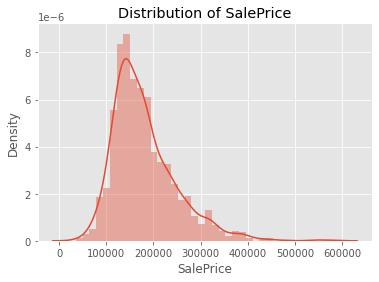

In [63]:
#Checking the distribution of the SalePrice
plt.title('Distribution of SalePrice')
sns.distplot( data['SalePrice'] )
plt.show()

- It is little skewed. Plot SalePrice in Log scale and check the distributiom is normal or not

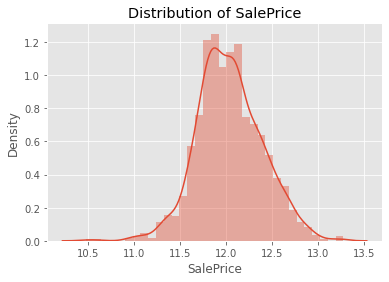

In [64]:
#Checking the distribution of the SalePrice in the scale of 'log'
plt.title('Distribution of SalePrice')
sns.distplot( np.log(data['SalePrice'] ) )
plt.show()

- Distribution is quite normal.

In [65]:
#So we will transform SalesPrice in log scale

data["SalePrice"] = data['SalePrice'].transform(np.log)

### 4.2 Paiplot

In [66]:
#checking the number of numerical values
data.select_dtypes( include = ['int64','float64'] ).shape

(1270, 34)

- There are 34 columns. It will be take too long to run so we will choose some of them. 

In [67]:
#Get the columns to be presented visually
data.select_dtypes(include = ['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'HouseAge', 'GarageOldOrNew'],
      dtype='object')

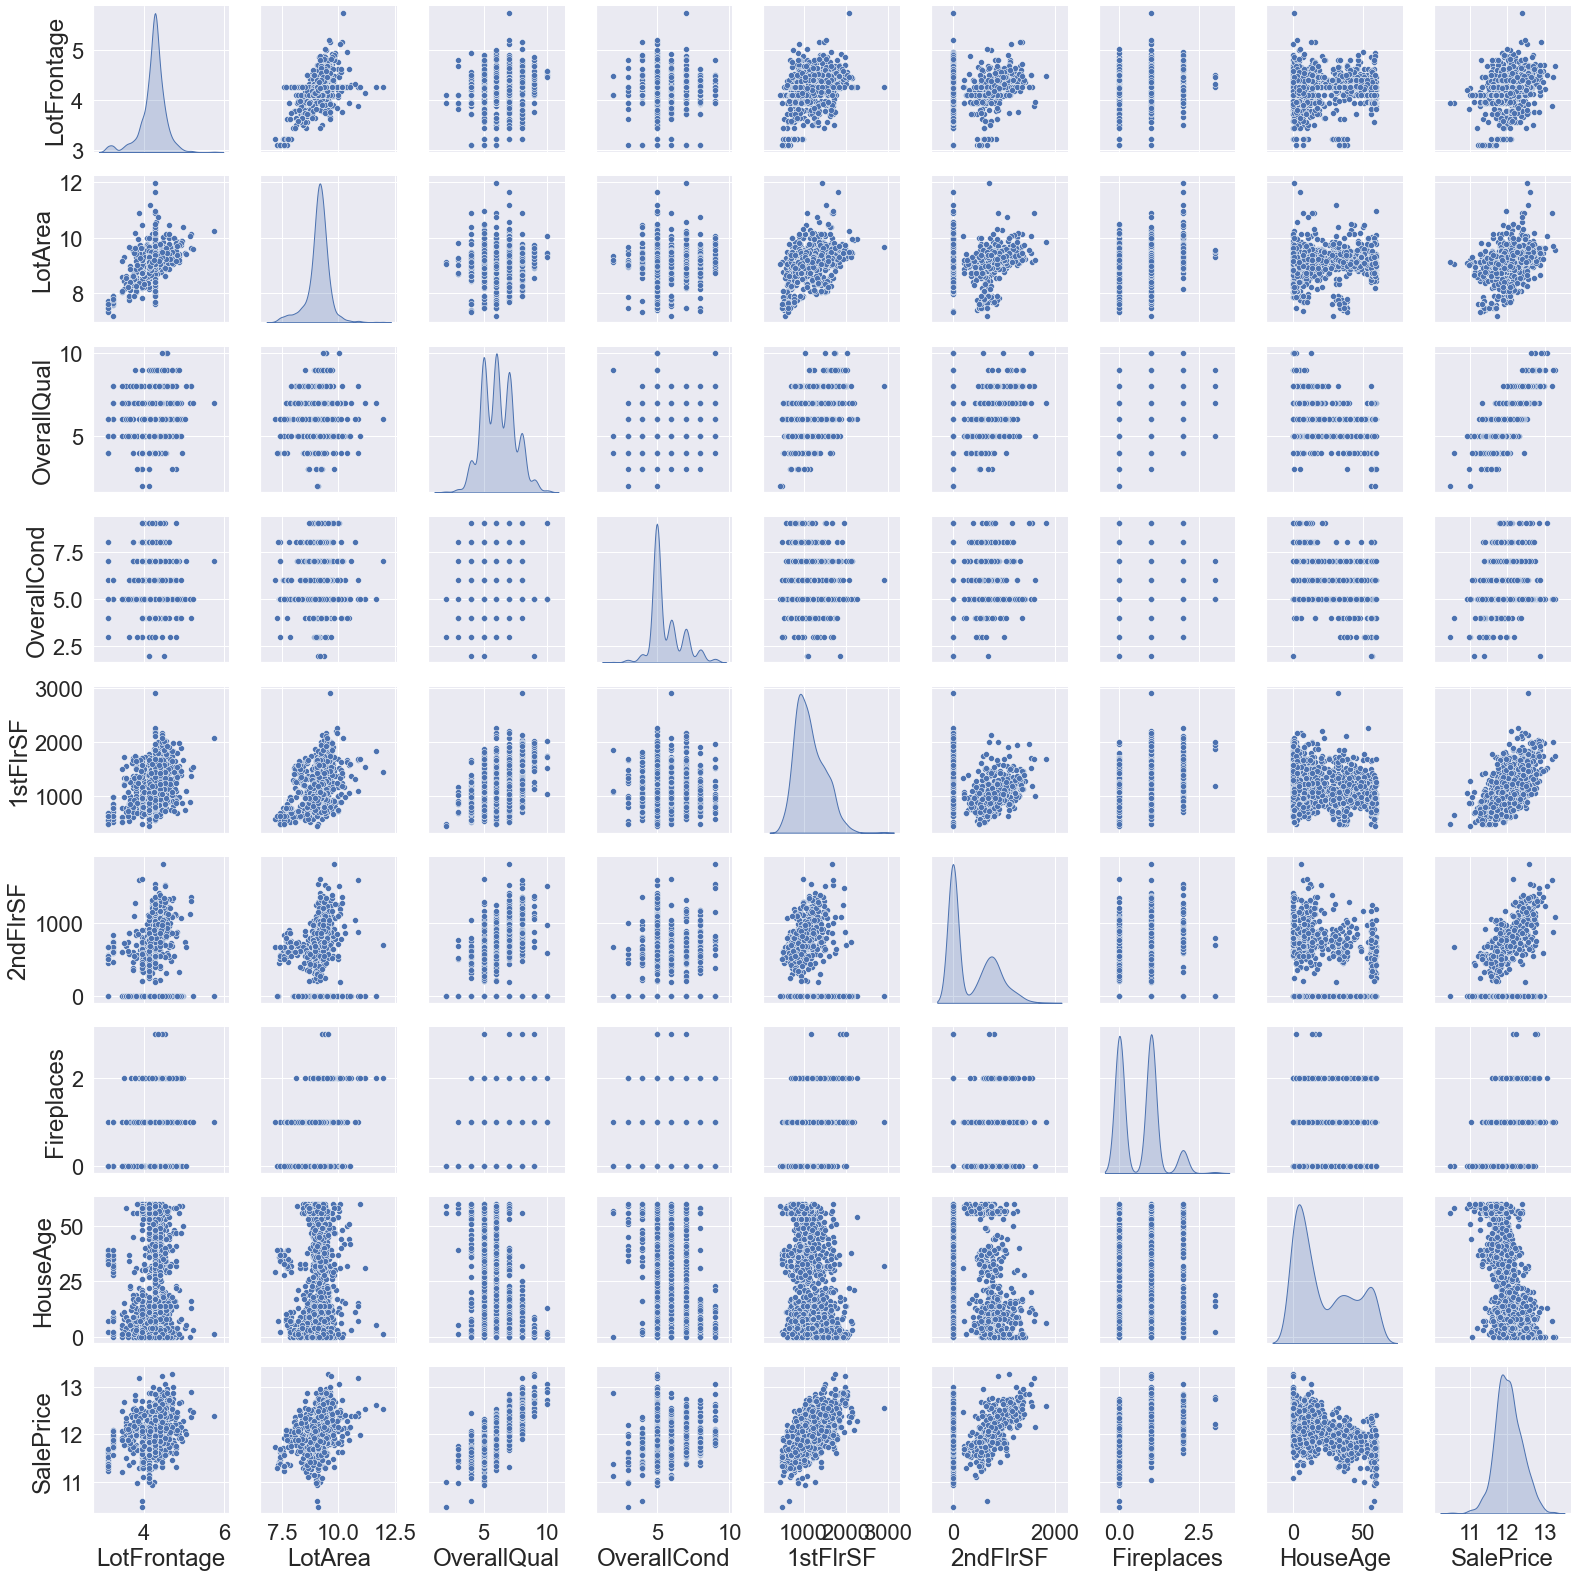

In [68]:
#plotting a pairplot with definite attributes
sns.set(font_scale = 2)   #increase the fontsize for better view

sns.pairplot(data, vars=['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
                        '1stFlrSF', '2ndFlrSF', 'Fireplaces', 'HouseAge', 'SalePrice' ], diag_kind ='kde' )

plt.xticks( fontsize = 50 )
plt.yticks( fontsize = 50 )
plt.show()


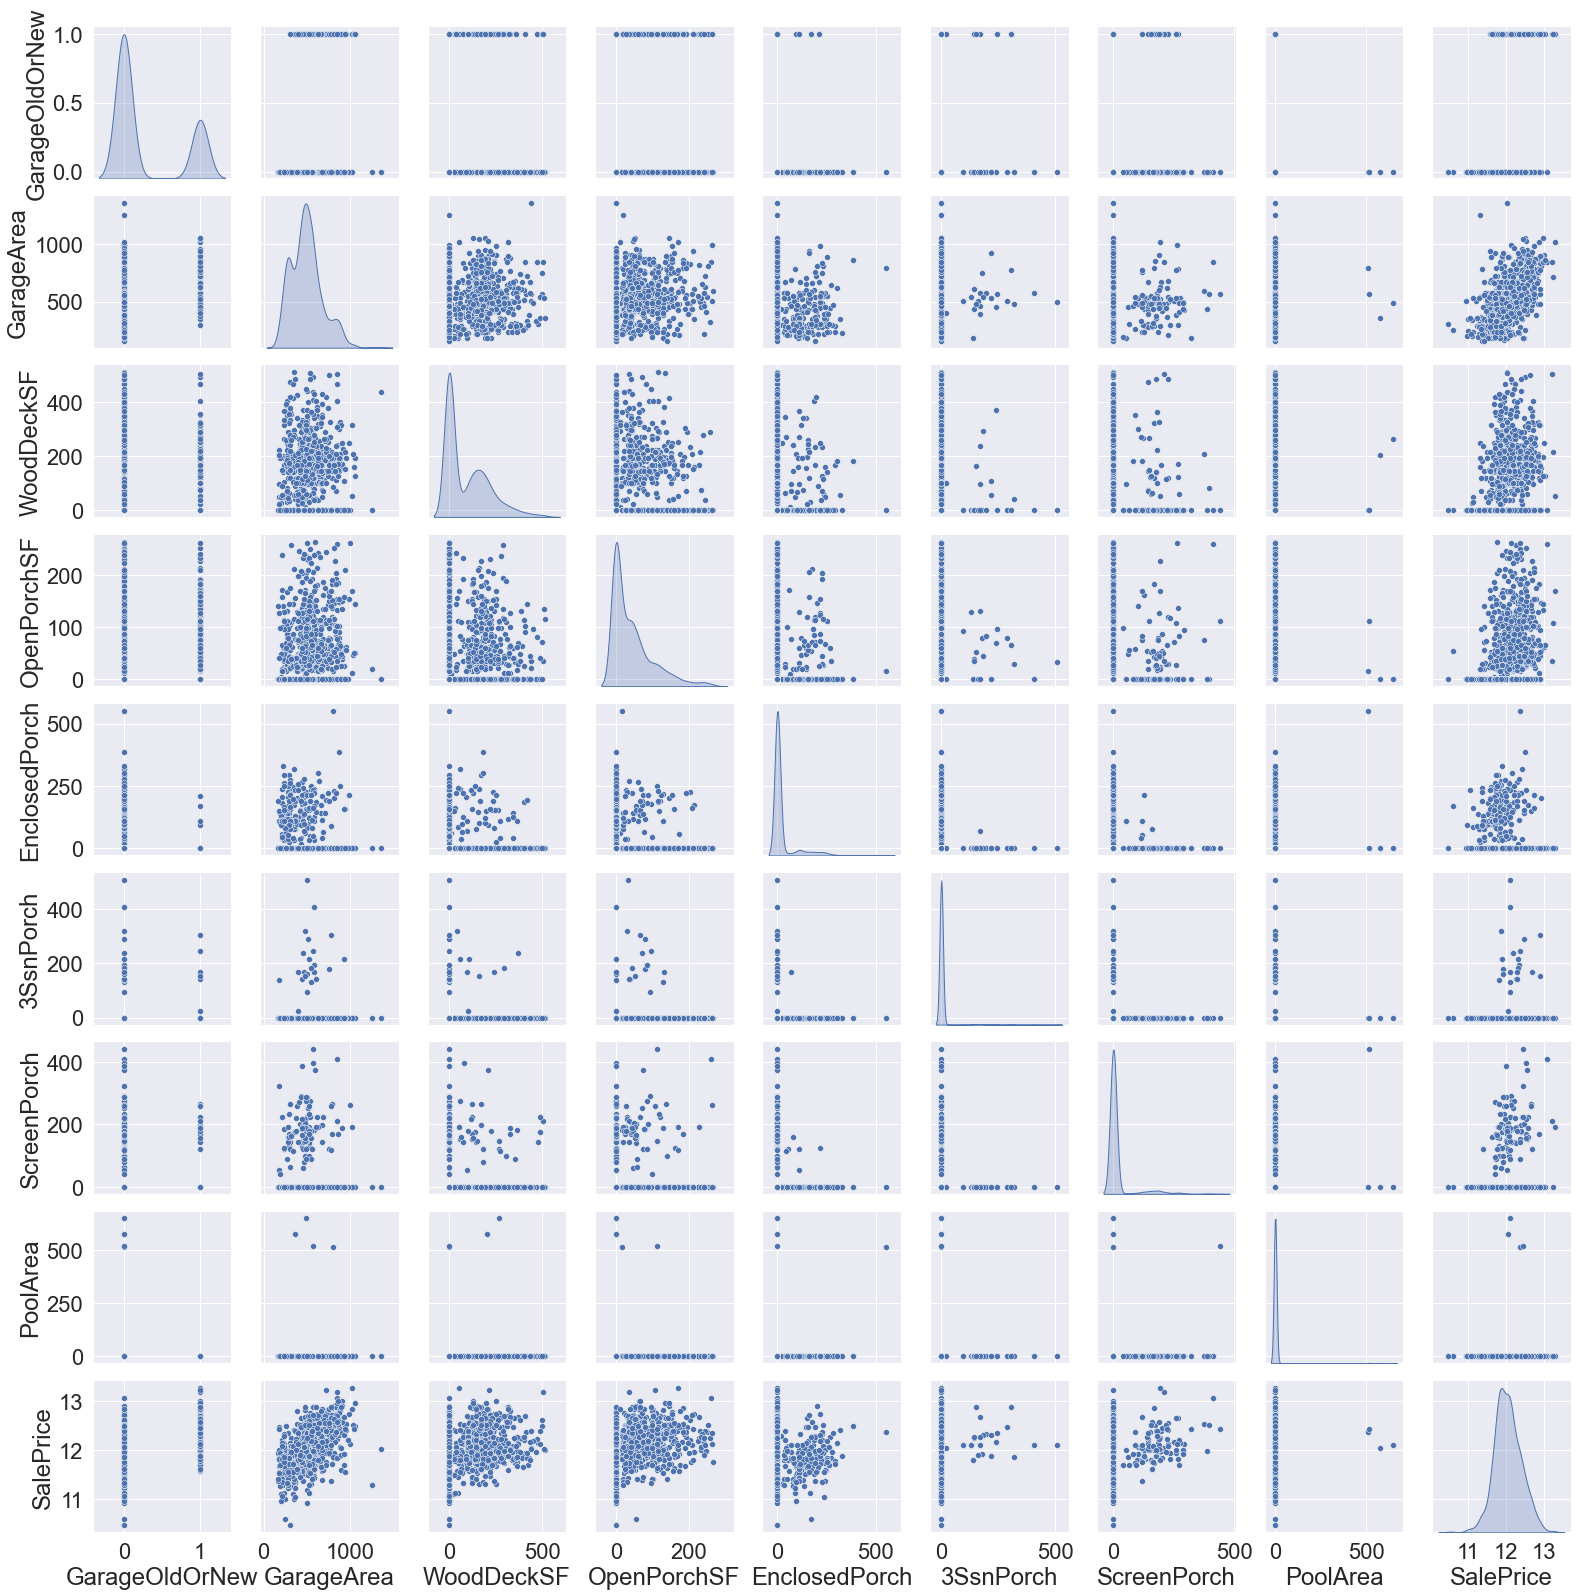

In [69]:
#plotting a pairplot with definite attributes
sns.set(font_scale = 2)   #increase the fontsize for better view

sns.pairplot(data, vars=['GarageOldOrNew','GarageArea', 'WoodDeckSF',
                         'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','SalePrice' ], diag_kind ='kde' )

plt.xticks( fontsize = 50 )
plt.yticks( fontsize = 50 )
plt.show()


**Insights:**
- Some columns have a linear relationship between them.


### 4.3 Heatmap

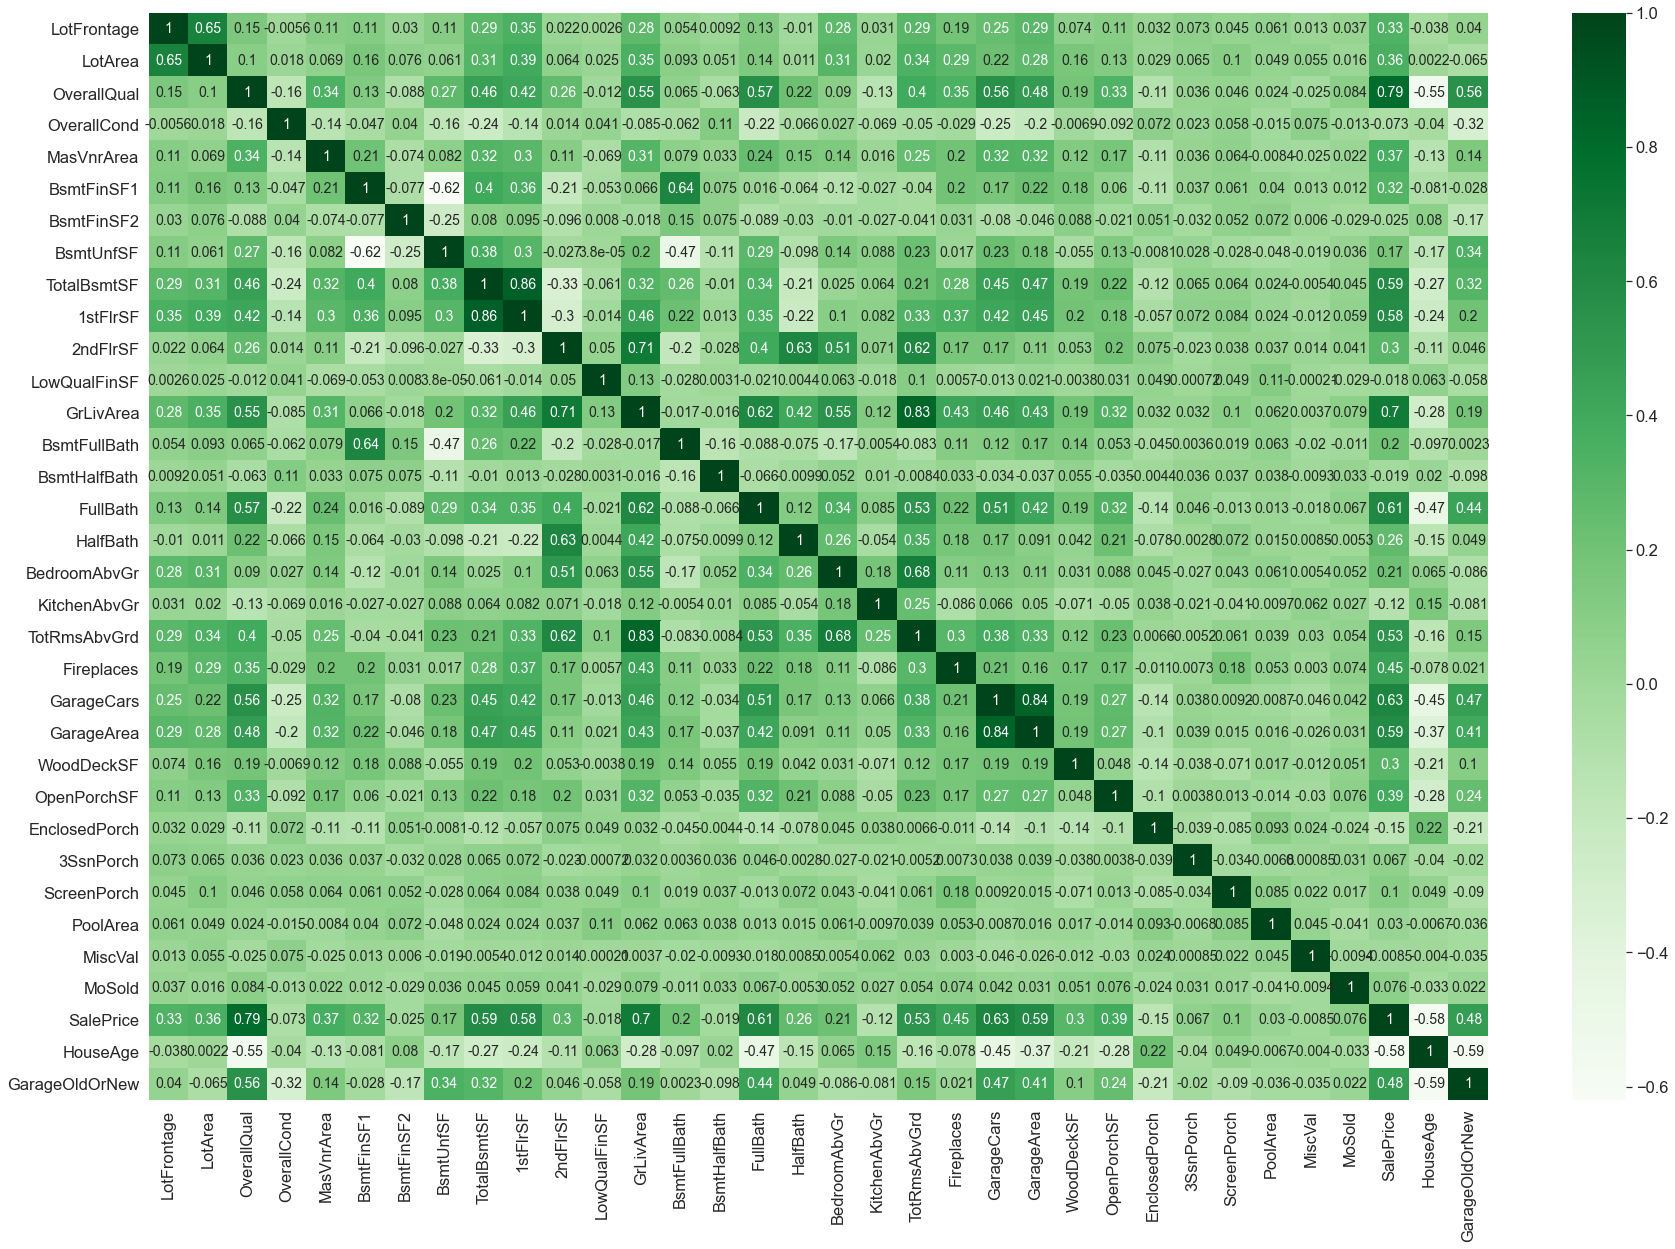

In [70]:
# Using heatmap to check correlation between the numerical variables
sns.set(font_scale = 1.5)   #setting fontsize to normal

plt.figure(figsize = (30, 20))
sns.heatmap( data.corr(), annot = True, cmap = "Greens", annot_kws = {"size": 14} )
plt.show()

**Insights:**<br>
Some of the highest correlations are:
- **`'GrLivArea' and 'TotRmsAbvGrd'`** have the highest correlation of 0.83
- **`'TotalBsmtSF' and '1stFlrSF'`** have the highest correlation of 0.86
- **`'GarageArea' and 'GarageCars'`** have the highest correlation of 0.84
- **`'OverallQual' and 'SalePrice'`** have a high correlation of 0.79 .
- **`'BsmtFinSF1' and 'BsmtUnfSF'`** have a high correlation of -0.62 .

In [71]:
'''So we have to make decision here to remove any one of the two highly correlated variables. Let’s drop 1stFlrSF,
TotRmsAbvGrd and GarageArea.'''

data.drop( ['1stFlrSF','TotRmsAbvGrd','GarageArea','BsmtUnfSF'], axis=1,inplace=True )

### 4.4 Some other plots

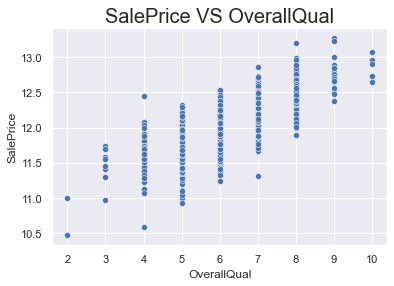

In [72]:
# Lets ck out 'SalePrice' VS 'OverallQual'
sns.set(font_scale = 1)
sns.scatterplot(data.OverallQual , data.SalePrice)
plt.title('SalePrice VS OverallQual' , fontsize = 20 )
plt.show()

- Here we can observe a strong linear relationship

In [73]:
# MoSold: Month Sold (MM).This column convey the month in which the property was sold.

data.MoSold.value_counts()

6     222
7     202
5     180
4     124
8     105
3      86
10     77
11     74
9      54
12     51
2      48
1      47
Name: MoSold, dtype: int64

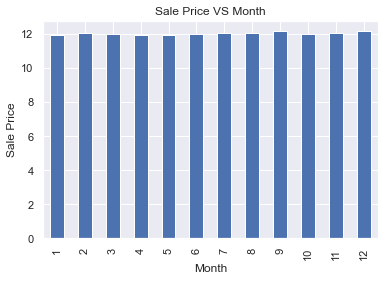

In [74]:
#check for the monthly sale price pattern
data.groupby('MoSold').SalePrice.median().plot.bar()
plt.title('Sale Price VS Month')
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show()

- Month-sold column has been considered as numeric type. Here, we do not see any monthly price pattern. Hence it seems of no use to include it as our model predictor. So it is better to drop it.

In [75]:
#Dropping the column
data.drop('MoSold' , axis = 1, inplace = True)

## 5. Data Preparation

- Let's now prepare the data and build the model.

### 5.1 Creating Dummy Variables

- Creating dummy variables for categorical variables and merging it to original dataframe

In [76]:
# creating dummy variables for categorical variables

# subset all categorical variables
categorical_col = data.select_dtypes( include=['object'] )
categorical_col.head() 


,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,Gd,No,GLQ,Ex,Gd,Not Available,Attchd,RFn,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,FR2,Others,1Fam,1Story,Gable,MetalSd,MetalSd,...,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,...,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,Normal


In [77]:
# convert into dummies
house_dummies = pd.get_dummies(categorical_col, drop_first=True)
house_dummies.head()

,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD,MSSubClass_Others,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [78]:
# drop categorical variables 
data = data.drop(list(categorical_col.columns), axis=1)

In [79]:
# concat dummy variables with X
data_new = pd.concat([data, house_dummies], axis=1)

In [80]:
# storing column names in cols, so we can keep track of column name
cols = data_new.columns

### 5.2 Splitting the data into Train-Test split

In [81]:
# split into train and test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_new, train_size=0.7, test_size = 0.3, random_state = 42)



In [82]:
#Print the shape of the data
print( data_train.shape)
print(data_test.shape)

(889, 132)
(381, 132)


### 5.3 Scaling the features 
- Scaling all the variables - necessary before using Ridge or Lasso

In [83]:
#Scaling the variables of train set
data_train = pd.DataFrame(scale(data_train))
data_train.columns = cols
data_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=132)

In [84]:
#Scaling the variables of test set
data_test = pd.DataFrame(scale(data_test))
data_test.columns = cols
data_test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=132)

### 5.3 Splitting the dataset into dependent and independent variables

In [85]:
# For the train data
y_train = data_train['SalePrice']
X_train = data_train.drop('SalePrice',axis=1)

In [86]:
# For the test data
y_test = data_test['SalePrice']
X_test = data_test.drop('SalePrice',axis=1)

In [87]:
#Checking the shape of the training and test data
print(X_train.shape)
print(X_test.shape)

(889, 131)
(381, 131)


## 6. Model Selection and Evaluation

### 6.1 Linear Regression (Without Regularization)
- First we will use Linear Regression without any regularization and lets see the results obtained.

In [88]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [89]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotFrontage,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,BsmtFullBath,True,1
8,KitchenAbvGr,True,1
9,GarageCars,True,1


In [90]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [91]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [92]:
#Linear Regression without any regularization

#Fitting linear regression model to new data obtained by using RFE on it
lm.fit(X_train, y_train)

#predicting on train and test set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print('train R2 score is',(r2_score(y_train,y_train_pred)))
print('test R2 score is',(r2_score(y_test,y_test_pred)))


train R2 score is 0.9257343000128255
test R2 score is 0.8737290472090731


In [93]:
#Printing MSE
print('Mean Squared Error for train data: ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data: ',metrics.mean_squared_error(y_test, y_test_pred))

Mean Squared Error for train data:  0.07426569998717443
Mean Squared Error for test data:  0.12627095279092687


- We got a decent R2 score for train and test data.And also we got minimum mean squared error for both data

### 6.2 Linear Regression (Ridge Regularization)

- Now we will perform ridge regression. We will be doing hyper parameter tuning in order to get best alpha to work with.

In [94]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV( estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  #we will use negative mean absolute score for evaluation
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1 )            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# display the mean scores and save in the dataframe

ridge_cv_result = pd.DataFrame(model_cv.cv_results_)
ridge_cv_result[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values( by = ['rank_test_score'],
                                                                                                      ignore_index=True)


,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,7,-0.200973,-0.223112,1
1,6,-0.200872,-0.223114,2
2,8,-0.201081,-0.223121,3
3,9,-0.201189,-0.223130,4
4,5,-0.200784,-0.223139,5
5,10,-0.201307,-0.223157,6
6,4,-0.200716,-0.223226,7
7,3,-0.200669,-0.223375,8
8,2,-0.200631,-0.223600,9
9,20,-0.202404,-0.223714,10


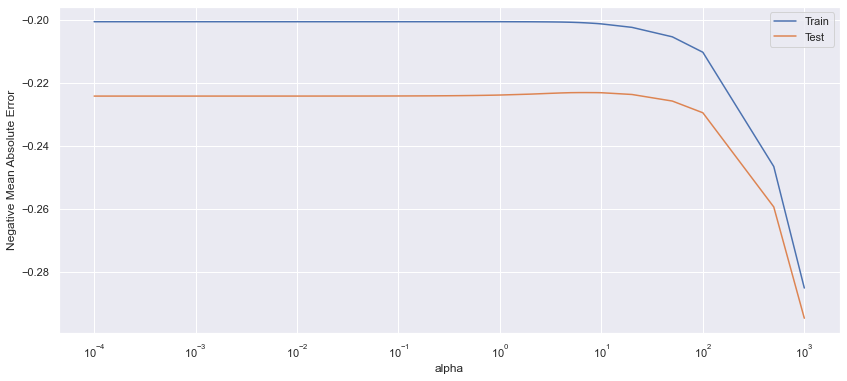

In [96]:
#plotting Negative  Mean Absolute Error vs alpha value to get the optimal values

plt.figure( figsize = (14,6))

plt.plot(ridge_cv_result['param_alpha'], ridge_cv_result['mean_train_score'], label='Train')
plt.plot(ridge_cv_result['param_alpha'], ridge_cv_result['mean_test_score'], label='Test')

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.legend()
plt.show()



In [97]:
# get the best estimator for lambda/ alpha

model_cv.best_estimator_

Ridge(alpha=7.0)

- Let’s check the model’s performance on different values of alpha i.e. 7, 10, 20, 50.

In [98]:
# check the coefficient values with different lambdas

#for alpha = 7
alpha = 7
ridge = Ridge(alpha = alpha) 
ridge.fit(X_train,y_train)   #fit the data
y_train_pred = ridge.predict(X_train)   # predict on train set
y_test_pred = ridge.predict(X_test)     # predict on test set
print('train R2 score for alpha = 7 is',round( r2_score(y_train,y_train_pred),2) )
print('test R2 score for alpha = 7 is',round( r2_score(y_test,y_test_pred),2) )
print('Mean Squared Error for train data(alpha=7): ',metrics.mean_squared_error( y_train, y_train_pred) )
print('Mean Squared Error for test data(alpha=7): ',metrics.mean_squared_error( y_test, y_test_pred) )
print('--'*50)

#for alpha = 10
alpha = 10
ridge = Ridge(alpha=alpha)     
ridge.fit(X_train,y_train)   #fit the data
y_train_pred = ridge.predict(X_train)    # predict on train set
y_test_pred = ridge.predict(X_test)      # predict on test set
print('train R2 score for alpha = 10 is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score for alpha = 10 is',round(r2_score(y_test,y_test_pred),2))
print('Mean Squared Error for train data(alpha=10): ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data(alpha=10): ',metrics.mean_squared_error(y_test, y_test_pred))
print('--'*50)

#for alpha = 20
alpha = 20
ridge = Ridge(alpha=alpha)    
ridge.fit(X_train,y_train)   #fit the data
y_train_pred = ridge.predict(X_train)     # predict on train set
y_test_pred = ridge.predict(X_test)       # predict on test set
print('train R2 score for alpha = 20 is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score for alpha = 20 is',round(r2_score(y_test,y_test_pred),2))
print('Mean Squared Error for train data(alpha=20): ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data(alpha=20): ',metrics.mean_squared_error(y_test, y_test_pred))
print('--'*50)

#for alpha = 50
alpha = 50         
ridge = Ridge(alpha=alpha)     
ridge.fit(X_train,y_train)     #fit the data
y_train_pred = ridge.predict(X_train)     # predict on train set
y_test_pred = ridge.predict(X_test)        # predict on test set
print('train R2 score for alpha = 50 is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score for alpha = 50 is',round(r2_score(y_test,y_test_pred),2))
print('Mean Squared Error for train data(alpha=50): ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data(alpha=50): ',metrics.mean_squared_error(y_test, y_test_pred))

train R2 score for alpha = 7 is 0.93
test R2 score for alpha = 7 is 0.88
Mean Squared Error for train data(alpha=7):  0.0744424261725826
Mean Squared Error for test data(alpha=7):  0.12409086124079716
----------------------------------------------------------------------------------------------------
train R2 score for alpha = 10 is 0.93
test R2 score for alpha = 10 is 0.88
Mean Squared Error for train data(alpha=10):  0.07457398891414131
Mean Squared Error for test data(alpha=10):  0.12346255937070734
----------------------------------------------------------------------------------------------------
train R2 score for alpha = 20 is 0.92
test R2 score for alpha = 20 is 0.88
Mean Squared Error for train data(alpha=20):  0.07509231207817584
Mean Squared Error for test data(alpha=20):  0.12201700396533131
----------------------------------------------------------------------------------------------------
train R2 score for alpha = 50 is 0.92
test R2 score for alpha = 50 is 0.88
Mean Squa

- With help of above plot and different alpha values we can choose the optimum value of alpha as 7. R2 score for train and test data with Ridge regularisation __(alpha = 7)__ are signifying the model is good with good bias-variance trade off.

In [99]:
#Using Ridge with best estimator
alpha = 7
ridge = Ridge(alpha=alpha)     
ridge.fit(X_train,y_train)     #fit the model

#predicting
y_train_pred = ridge.predict(X_train)   #predict on train set
y_test_pred = ridge.predict(X_test)       #predict on train set

print('train R2 score for alpha = 7 is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score for alpha = 7 is',round(r2_score(y_test,y_test_pred),2))
print('Mean Squared Error for train data(alpha=7): ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data(alpha=7): ',metrics.mean_squared_error(y_test, y_test_pred))

train R2 score for alpha = 7 is 0.93
test R2 score for alpha = 7 is 0.88
Mean Squared Error for train data(alpha=7):  0.0744424261725826
Mean Squared Error for test data(alpha=7):  0.12409086124079716


#### Get coef_ values 

In [100]:
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = data_train.columns
cols.insert(0,'const')

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']


#printing the coef_ values
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
7,TotalBsmtSF,0.317794
3,OverallCond,0.230918
6,BsmtFinSF2,0.154862
4,MasVnrArea,0.128700
45,LotConfig_Inside,0.116792
50,Neighborhood_IDOTRR,0.095088
5,BsmtFinSF1,0.085940
48,Neighborhood_Edwards,0.084068
2,OverallQual,0.076340
10,GrLivArea,0.069354


In [101]:
##Get the equation for this linear regression

#get dictionary containing all the variables and coefficients after lasso regression
ridge_dict = dict(zip(X_train.columns,ridge.coef_))

#filter dictionary for only non-zero coefficients
final_dict = {}
for i in ridge_dict:
    if ridge_dict[i] != 0:
        final_dict[i] = round(ridge_dict[i],3)    #rounding coefficient to 3 significant digits
final_dict

import operator

final_dict = dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))
#printing the final model equation

a = ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict.items()]))
print("Sales Price = {0}+ [ {1} ]".format(round(ridge.intercept_,3),a))

Sales Price = 0.0+ [ 0.318 X GrLivArea + 0.231 X OverallQual + 0.155 X TotalBsmtSF + 0.129 X OverallCond + 0.117 X GarageType_Attchd + 0.095 X SaleCondition_Partial + 0.086 X BsmtFinSF1 + 0.084 X GarageType_Detchd + 0.076 X LotArea + 0.069 X GarageCars + 0.066 X Foundation_PConc + 0.063 X MasVnrType_BrkFace + 0.062 X GarageType_BuiltIn + 0.058 X MSSubClass_2-STORY 1946 & NEWER + 0.058 X Neighborhood_Crawfor + 0.057 X MSSubClass_1-STORY 1946 & NEWER ALL STYLES + 0.049 X BsmtExposure_Gd + 0.048 X LotFrontage + 0.048 X MasVnrType_Stone + 0.048 X SaleCondition_Normal + 0.047 X MasVnrType_None + 0.044 X BsmtFullBath + 0.038 X GarageOldOrNew + 0.035 X MSSubClass_1-STORY PUD + 0.034 X HouseStyle_2Story + 0.033 X LotConfig_CulDSac + 0.033 X HouseStyle_SLvl + 0.031 X WoodDeckSF + 0.031 X ScreenPorch + 0.025 X GarageType_Basment + -0.031 X KitchenQual_Fa + -0.036 X Exterior1st_VinylSd + -0.037 X MSSubClass_1-STORY 1945 & OLDER + -0.038 X Neighborhood_Edwards + -0.042 X Exterior1st_CemntBd + -0.0

### 6.3 Linear Regression (Lasso Regularization)
- Now we will perform ridge regression

In [102]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Initiate
lasso = Lasso()   

# cross validation
folds = 5
lasso_model_cv = GridSearchCV( estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1 )            
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
# display the mean scores
lasso_cv_result = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_result[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values( by = ['rank_test_score'],
                                                                                                      ignore_index=True)


,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.001,-0.201537,-0.224035,1
1,0.0001,-0.200641,-0.224147,2
2,0.01,-0.213910,-0.232656,3
3,0.05,-0.243753,-0.253769,4
4,0.1,-0.284050,-0.290074,5
5,0.2,-0.362910,-0.368375,6
6,0.3,-0.440243,-0.444878,7
7,0.4,-0.516201,-0.519648,8
8,0.5,-0.589070,-0.591281,9
9,0.6,-0.663276,-0.665717,10


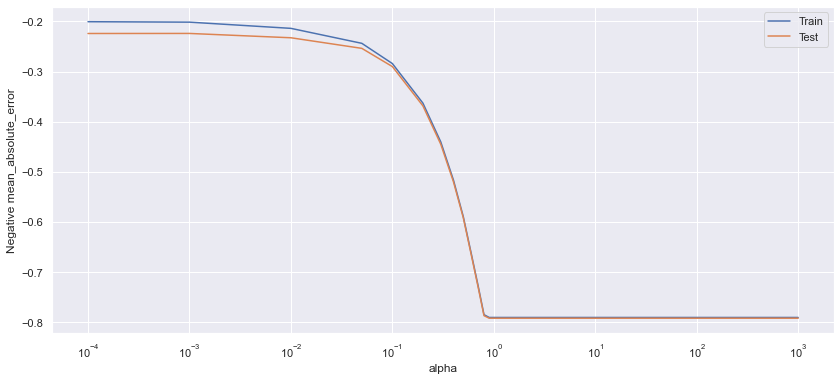

In [104]:
#plotting Negative Mean Absolute Score vs alpha value
plt.figure( figsize = (14,6))

plt.plot(lasso_cv_result['param_alpha'], lasso_cv_result['mean_train_score'], label='Train')
plt.plot(lasso_cv_result['param_alpha'], lasso_cv_result['mean_test_score'], label='Test')

plt.xlabel('alpha')
plt.ylabel('Negative mean_absolute_error')
plt.xscale('log')
plt.legend()
plt.show()


In [105]:
# get the best estimator for lambda/alpha

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [106]:
# check the coefficient values with different lambdas 0.1,0.001,0.0001

#for alpha = 0.01
alpha = 0.01
lasso = Lasso(alpha=alpha)    
lasso.fit(X_train,y_train)    #Fit the data
y_train_pred = lasso.predict(X_train)      # predict on train set
y_test_pred = lasso.predict(X_test)         # predict on test set
print('train R2 score for alpha = 0.01 is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score for alpha = 0.01 is',round(r2_score(y_test,y_test_pred),2))
print('Mean Squaed Error for train data(alpha=0.01): ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data(alpha=0.01): ',metrics.mean_squared_error(y_test, y_test_pred))
print('--'*50)

#for alpha = 0.001
alpha = 0.001    #Best_param
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)     #fit the data
y_train_pred = lasso.predict(X_train)     # predict on train set
y_test_pred = lasso.predict(X_test)        # predict on test set
print('train R2 score for alpha = 0.001 is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score for alpha = 0.001 is',round(r2_score(y_test,y_test_pred),2))
print('Mean Squared Error for train data(alpha=0.001): ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data(alpha=0.001): ',metrics.mean_squared_error(y_test, y_test_pred))
print('--'*50)

#for alpha = 0.0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)     #Fit the data
y_train_pred = lasso.predict(X_train)     # predict on train set
y_test_pred = lasso.predict(X_test)        # predict on test set
print('train R2 score for alpha = 0.0001 is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score for alpha = 0.0001 is',round(r2_score(y_test,y_test_pred),2))
print('Mean Squared Error for train data(alpha=0.0001): ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data(alpha=0.0001): ',metrics.mean_squared_error(y_test, y_test_pred))

train R2 score for alpha = 0.01 is 0.92
test R2 score for alpha = 0.01 is 0.88
Mean Squaed Error for train data(alpha=0.01):  0.08415860533207196
Mean Squared Error for test data(alpha=0.01):  0.12432988366978835
----------------------------------------------------------------------------------------------------
train R2 score for alpha = 0.001 is 0.93
test R2 score for alpha = 0.001 is 0.88
Mean Squared Error for train data(alpha=0.001):  0.07482157829458026
Mean Squared Error for test data(alpha=0.001):  0.1232080552894525
----------------------------------------------------------------------------------------------------
train R2 score for alpha = 0.0001 is 0.93
test R2 score for alpha = 0.0001 is 0.87
Mean Squared Error for train data(alpha=0.0001):  0.07427128188963932
Mean Squared Error for test data(alpha=0.0001):  0.12589950002181913


- With help of above plot and different alpha values we can choose the optimum value of alpha as 0.001 . R2 score for train and test data with Ridge regularisation __(alpha=0.001)__ are signifying the model is good with good bias-variance trade off.

In [107]:
#Best_param
alpha = 0.001    
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)    #fit the data
y_train_pred= lasso.predict(X_train)       # predict on train set
y_test_pred= lasso.predict(X_test)         # predict on test set
print('train R2 score for alpha = 0.001 is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score for alpha = 0.001 is',round(r2_score(y_test,y_test_pred),2))
print('Mean Squared Error for train data(alpha=0.001): ',metrics.mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error for test data(alpha=0.001): ',metrics.mean_squared_error(y_test, y_test_pred))

train R2 score for alpha = 0.001 is 0.93
test R2 score for alpha = 0.001 is 0.88
Mean Squared Error for train data(alpha=0.001):  0.07482157829458026
Mean Squared Error for test data(alpha=0.001):  0.1232080552894525


#### Get the coef_ values

In [108]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = data_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']


#printing the coef_ values
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
7,TotalBsmtSF,0.323659
3,OverallCond,0.236842
6,BsmtFinSF2,0.152384
4,MasVnrArea,0.130136
45,LotConfig_Inside,0.100295
50,Neighborhood_IDOTRR,0.096178
5,BsmtFinSF1,0.086778
2,OverallQual,0.073821
10,GrLivArea,0.068704
48,Neighborhood_Edwards,0.066733


In [109]:
#Get the equation for this linear regression

#get dictionary containing all the variables and coefficients after lasso regression
lasso_dict = dict(zip(X_train.columns,lasso.coef_))

#filter dictionary for only non-zero coefficients
final_dict = {}
for i in lasso_dict:
    if lasso_dict[i] != 0:
        final_dict[i] = round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits
final_dict

import operator

final_dict = dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))
#printing the final model equation
a = ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict.items()]))
print("Sales Price = {0}+ [ {1} ]".format(round(lasso.intercept_,3),a))

Sales Price = 0.0+ [ 0.324 X GrLivArea + 0.237 X OverallQual + 0.152 X TotalBsmtSF + 0.13 X OverallCond + 0.1 X GarageType_Attchd + 0.096 X SaleCondition_Partial + 0.087 X BsmtFinSF1 + 0.074 X LotArea + 0.069 X GarageCars + 0.067 X Foundation_PConc + 0.067 X GarageType_Detchd + 0.058 X Neighborhood_Crawfor + 0.057 X MSSubClass_2-STORY 1946 & NEWER + 0.056 X MSSubClass_1-STORY 1946 & NEWER ALL STYLES + 0.053 X GarageType_BuiltIn + 0.049 X BsmtExposure_Gd + 0.049 X SaleCondition_Normal + 0.046 X LotFrontage + 0.044 X BsmtFullBath + 0.037 X GarageOldOrNew + 0.033 X MSSubClass_1-STORY PUD + 0.033 X LotConfig_CulDSac + 0.032 X HouseStyle_SLvl + 0.03 X ScreenPorch + 0.03 X MasVnrType_BrkFace + 0.029 X WoodDeckSF + 0.029 X HouseStyle_2Story + 0.026 X MasVnrType_Stone + 0.02 X GarageType_Basment + 0.014 X MasVnrType_None + -0.01 X Exterior1st_VinylSd + -0.03 X KitchenQual_Fa + -0.032 X Exterior1st_CemntBd + -0.036 X MSSubClass_1-STORY 1945 & OLDER + -0.036 X Neighborhood_Edwards + -0.036 X Ext

## 7. Residual Analysis

- ### Residual Analysis of the train data

Text(0.5, 0, 'error')

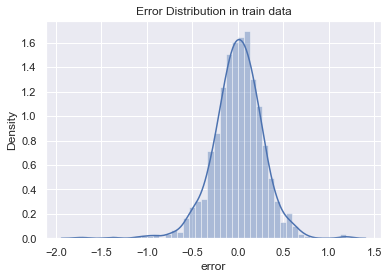

In [110]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Distribution in train data')
plt.xlabel('error')

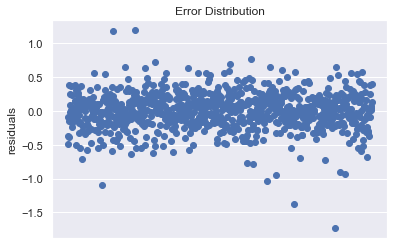

In [111]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

- From above we notice that there is no heteroscedasticity in residual plot.

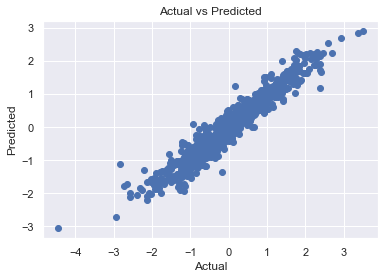

In [112]:
#Actual Vs Predicted
plt.scatter( y_train, y_train_pred )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- ### Residual Analysis for test data

Text(0.5, 0, 'error')

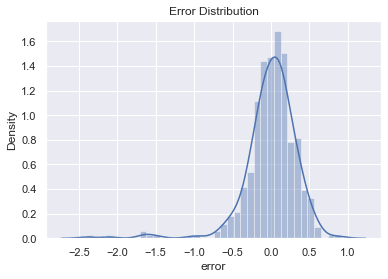

In [113]:
sns.distplot(y_test-y_test_pred)
plt.title('Error Distribution')
plt.xlabel('error')

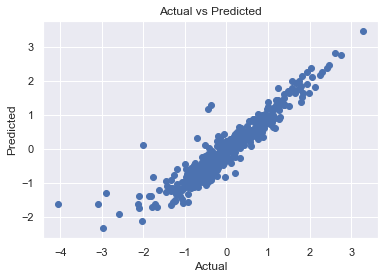

In [114]:
plt.scatter(y_test, y_test_pred )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.
So our final model equation is as under:<br>



#### Both Ridge and Lasso Regression give the similar results with slight changes in R2 score, MSE with slight changes. **` Lasso regression`** would be a better option it would help in feature elimination and the model will be more robust.

***Sales Price*** = 0.0+ [ 0.324 X __GrLivArea__ + 0.237 X __OverallQual__ + 0.152 X __TotalBsmtSF__ + 0.13 X __OverallCond__ + 0.1 X __GarageType_Attchd__+ 0.096 X __SaleCondition_Partial__ + 0.087 X __BsmtFinSF1__ + 0.074 X __LotArea__ + 0.069 X __GarageCars__ + 0.067 X __Foundation_PConc__ + 0.067 X __GarageType_Detchd__ + 0.058 X __Neighborhood_Crawfor__ + 0.057 X __MSSubClass_2-STORY 1946 & NEWER__ + 0.056 X __MSSubClass_1-STORY 1946 & NEWER ALL STYLES__ + 0.053 X __GarageType_BuiltIn__ + 0.049 X __BsmtExposure_Gd__ + 0.049 X __SaleCondition_Normal__ + 0.046 X __LotFrontage__ + 0.044 X __BsmtFullBath__ + 0.037 X __GarageOldOrNew__ + 0.033 X __MSSubClass_1-STORY PUD__ + 0.033 X __LotConfig_CulDSac__ + 0.032 X __HouseStyle_SLvl__ + 0.03 X __ScreenPorch__ + 0.03 X __MasVnrType_BrkFace__ + 0.029 X __WoodDeckS__F + 0.029 X __HouseStyle_2Story__ + 0.026 X __MasVnrType_Stone__ + 0.02 X __GarageType_Basment__ + 0.014 X __MasVnrType_None__ + -0.01 X __Exterior1st_VinylSd__ + -0.03 X __KitchenQual_Fa__ + -0.032 X __Exterior1st_CemntBd__ + -0.036 X __MSSubClass_1-STORY 1945 & OLDER__ + -0.036 X __Neighborhood_Edwards__ + -0.036 X __Exterior1st_MetalSd__ + -0.041 X __HouseAge__ + -0.043 X __Exterior1st_Others__ + -0.047 X __KitchenAbvGr__ + -0.048 X __Neighborhood_OldTown__ + -0.052 X __Neighborhood_NAmes__ + -0.054 X __Exterior1st_Plywood__ + -0.056 X __Exterior2nd_VinylSd__ + -0.068 X __MSZoning_Others__ + -0.07 X __Exterior1st_Wd Sdng__ + -0.074 X __Exterior1st_HdBoard__ + -0.076 X __MSZoning_RL__ + -0.098 X __MSZoning_RM__ + -0.11 X __KitchenQual_Gd__ + -0.122 X __KitchenQual_TA__ ]